# Heart Attack Prediction

A dataset for heart attack classification

dataset link : https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

dataset columns : 

- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
- thalach : maximum heart rate achieved
- target : 0 = less chance of heart attack

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/heart.csv')

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# EDA

1    165
0    138
Name: output, dtype: int64


<AxesSubplot:xlabel='output', ylabel='count'>

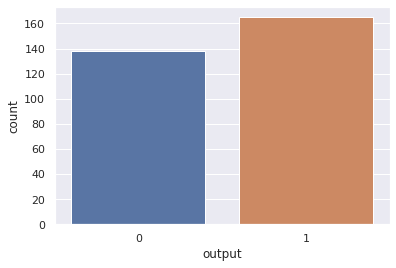

In [6]:
print(data['output'].value_counts())
sns.countplot(x='output', data=data)

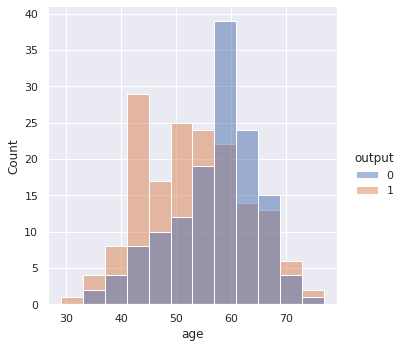

In [7]:
sns.displot(x='age', data=data, hue='output')

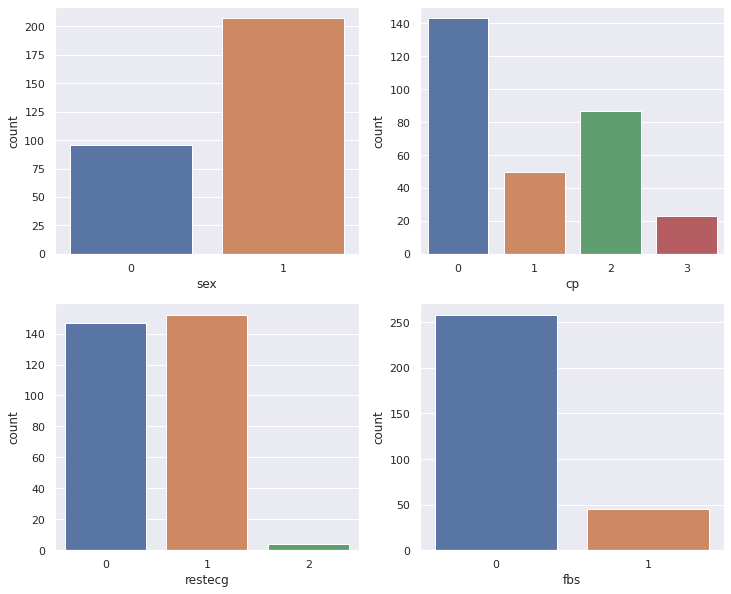

In [8]:
fig, ax =plt.subplots(2,2, figsize=(12, 10))
sns.countplot(x='sex', data=data, ax=ax[0, 0])  # plot sex column 
sns.countplot(x='cp', data=data, ax=ax[0, 1])   # plot cp column
sns.countplot(x='restecg', data=data, ax=ax[1, 0])  # plot restecg column
sns.countplot(x='fbs', data=data, ax=ax[1, 1])   # plot fbs column
fig.show()

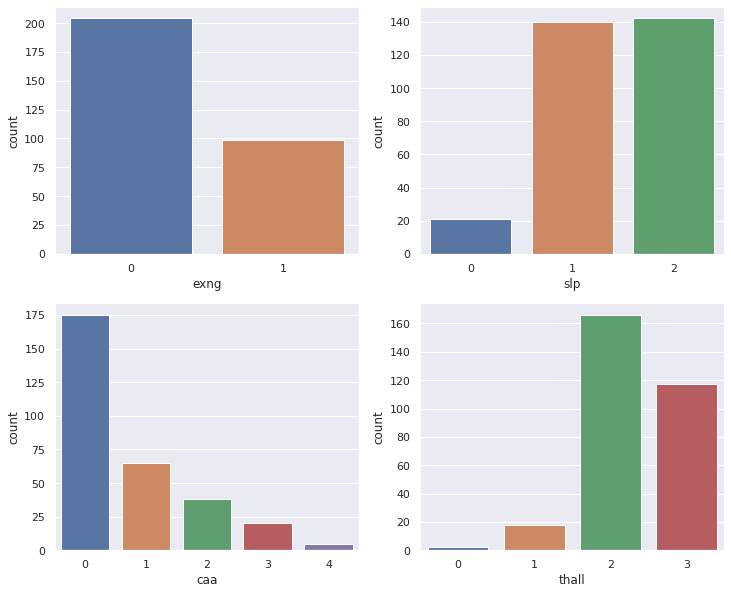

In [9]:
fig, ax =plt.subplots(2,2, figsize=(12,10))
sns.countplot(x='exng', data=data, ax=ax[0, 0])  # plot exng column 
sns.countplot(x='slp', data=data, ax=ax[0, 1])   # plot slp column
sns.countplot(x='caa', data=data, ax=ax[1, 0])  # plot caa column
sns.countplot(x='thall', data=data, ax=ax[1, 1])   # plot thall column
fig.show()

In [10]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

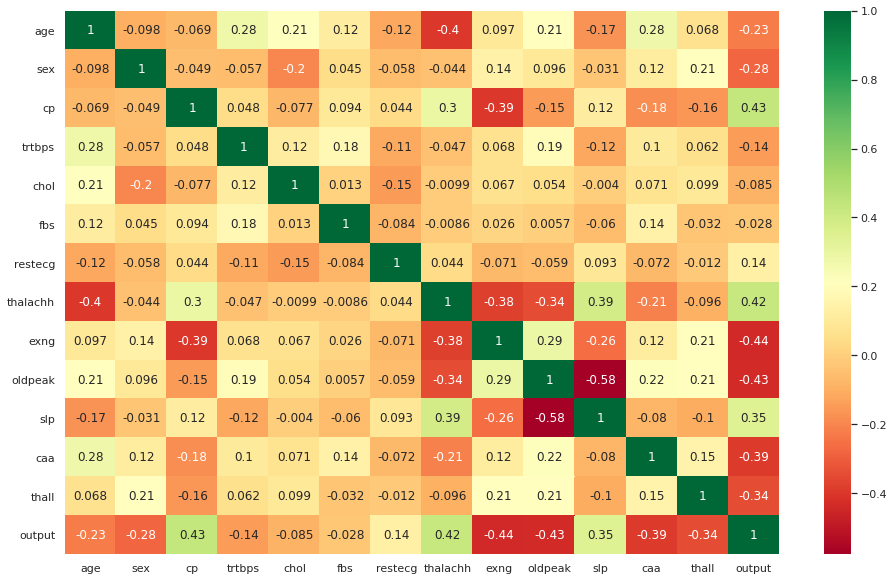

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

In [12]:
X = data.drop(['output'], axis=1)
y = data['output']

In [13]:
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [14]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X, y)

ExtraTreesClassifier()

In [17]:
print(et.feature_importances_)

[0.07154013 0.05731215 0.11934106 0.06209829 0.06144648 0.01867877
 0.03578238 0.08949651 0.10870669 0.08563746 0.07113483 0.11668694
 0.10213831]


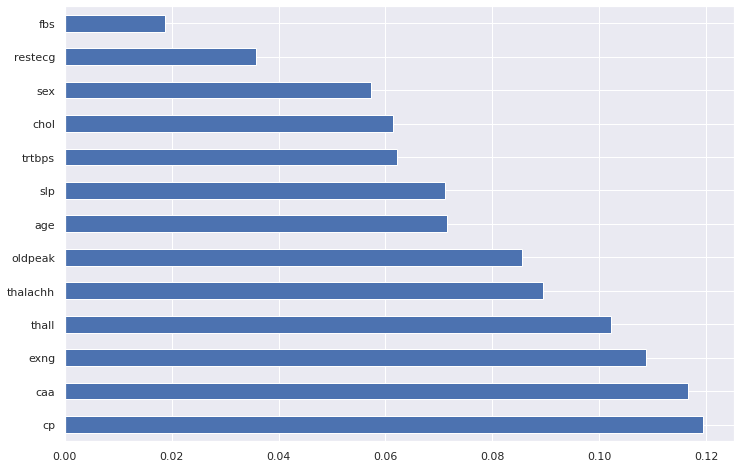

In [18]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(et.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Creation

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = clf_rf.predict(X_test)

Confusion Matrix : 


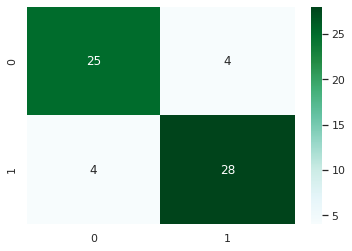

Accuracy Score : 0.8688524590163934


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
sns.heatmap(cm, annot=True, cmap='BuGn')
plt.show()
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)}")

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Precision Score : {precision_score(y_test, y_pred)}')
print(f'Recall Score : {recall_score(y_test, y_pred)}')
print(f'f1 Score : {f1_score(y_test, y_pred)}')

Precision Score : 0.875
Recall Score : 0.875
f1 Score : 0.875


# Hyperparameter Tuning

In [24]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

In [25]:
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [26]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(clf_rf, hyperF, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [27]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.3s
[CV] END max_depth=5,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1200]},
                   random_state=42, verbose=2)

In [28]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_depth': 25}

In [29]:
y_pred_random = rf_random.predict(X_test)

Confusion Matrix : 


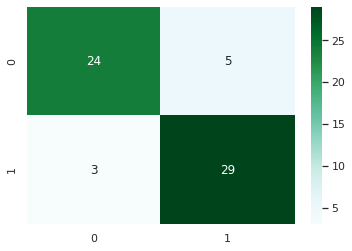

Accuracy Score : 0.8688524590163934


In [30]:
cm = confusion_matrix(y_test, y_pred_random)
print("Confusion Matrix : ")
sns.heatmap(cm, annot=True, cmap='BuGn')
plt.show()
print(f"Accuracy Score : {accuracy_score(y_test, y_pred_random)}")

In [31]:
print(f'Precision Score : {precision_score(y_test, y_pred_random)}')
print(f'Recall Score : {recall_score(y_test, y_pred_random)}')
print(f'f1 Score : {f1_score(y_test, y_pred_random)}')

Precision Score : 0.8529411764705882
Recall Score : 0.90625
f1 Score : 0.8787878787878787


In [32]:
import pickle
file = open('pkl/heart.pkl', 'wb')
pickle.dump(rf_random, file)
file.close()